# notes
* Now I know I should think in column vector, and Tensorflow is very picky about the shape of data. But in numpy, the normal 1D ndarray is represented as column vector already. If I reshape $\mathbb{R}^n$ as $\mathbb{R}^{n\times1}$, It's not the same as column vector anymore. It's Matrix with 1 column. And I got troubles with scipy optimizer. 
* So I should just treat tensorflow's data as special case. Keep using the convention of numpy world.

In [37]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import sys
sys.path.append('..')

from helper import logistic_regression as lr  # my own module
from helper import general as general

In [38]:
# prepare data
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [39]:
X = general.get_X(data)
print(X.shape)

y = general.get_y(data)
print(y.shape)

(100, 3)
(100,)


# sigmoid function

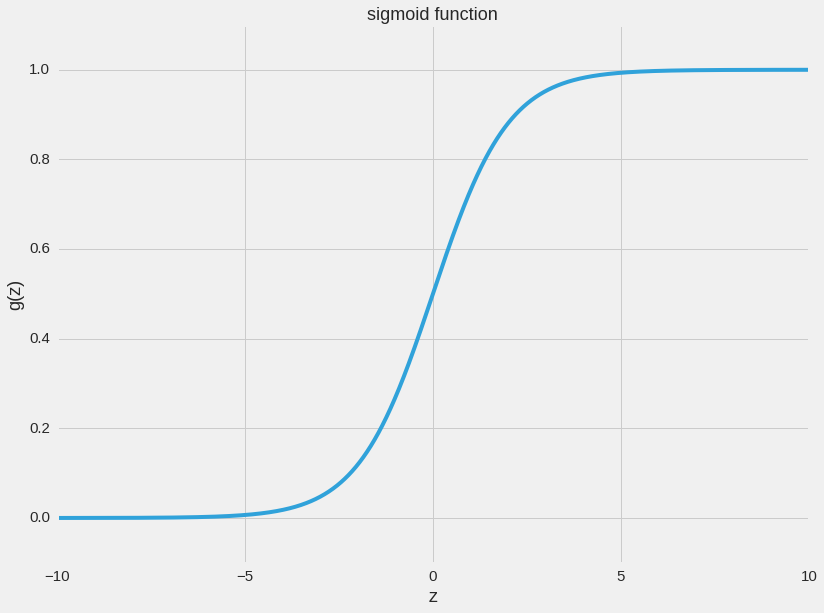

In [40]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(np.arange(-10, 10, step=0.01),
        lr.sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)

# cost function
![](../img/logistic_cost.png)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function


In [41]:
%psource lr.cost

In [42]:
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
theta

array([ 0.,  0.,  0.])

In [43]:
lr.cost(theta, X, y)

0.69314718055994529

looking good, be careful of the data shape

# gradient
![](../img/logistic_gradient.png)
> * this is batch gradient  
> * translate this into vector computation $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$


In [44]:
%psource lr.gradient

In [45]:
lr.gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# fit the parameter
> * here I'm using [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the parameters  
> * and I use this model without understanding.... what is `Jacobian` ...

In [46]:
import scipy.optimize as opt

In [47]:
res = opt.minimize(fun=lr.cost, x0=theta, args=(X, y), method='Newton-CG', jac=lr.gradient)

In [48]:
print(res)

     fun: 0.20349770280321056
     jac: array([  1.31110614e-05,   8.53917373e-04,   6.71174423e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 253
  status: 0
 success: True
       x: array([-25.15847675,   0.20620886,   0.20144849])


# predict and validate from training set
> now we are using training set to evaluate the model, this is not the best practice, but the course just begin, I guess Andrew will cover how to do model validation properlly later

In [49]:
%psource lr.predict

In [50]:
final_theta = res.x
y_pred = lr.predict(X, final_theta)
accuracy = np.mean(y_pred == y)

print(accuracy)

0.89


# find the decision boundary
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

In [51]:
print(res.x) # this is final theta

[-25.15847675   0.20620886   0.20144849]


In [52]:
coef = -(res.x / res.x[2])  # find the equation
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x

[ 124.88789225   -1.02363073   -1.        ]


In [53]:
data.describe()  # find the range of x and y

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


> you know the intercept would be around 125 for both x and y

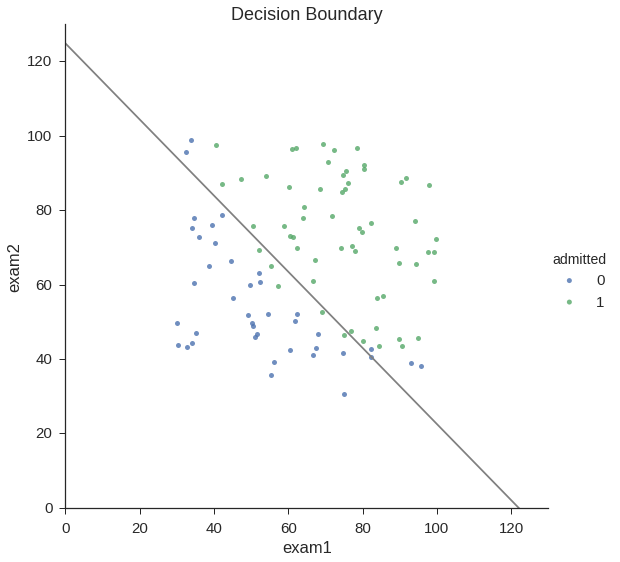

In [54]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=8, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')